In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
from pprint import pprint

from scipy.stats import zscore

# Definitions

In [51]:
# fields
target_field = 'SalePrice'
ignore_fields = ['Id']

# outliers
zscore_threshold = 4.0

# Step 00: Load the data 

In [52]:
train = pd.read_csv('data/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Step 01: Feature exploration

### 01.00: Identify target variable

In [54]:
train = train.rename(columns = {target_field: 'target'})
test = test.rename(columns = {target_field: 'target'})

### 01.01: Specify variables to ignore

In [55]:
train = train.drop(ignore_fields, axis=1)
test = test.drop(ignore_fields, axis=1)

### 01.02: Identify fields in train missing in test

In [56]:
pprint([x for x in list(train) if x not in list(test) and x != 'target'])

[]


In [57]:
pprint([x for x in list(test) if x not in list(train)])

[]


### 01.03 Identify fields with null values

In [58]:
count = 0
for field in list(train): 
    n1 = len(train[train[field].isnull()])
    if len(tmp1>0):
        str1 = "train has - ", len(tmp1), " null values"
        
    if field in test:
        n2 = len(test[test[field].isnull()])
    else:
        n2 = "N/A"
    if n1 or n2:
        count += 1
        print(count, field, "train has - ", n1, " null values, test has - ", n2, " null values")

1 MSZoning train has -  0  null values, test has -  4  null values
2 LotFrontage train has -  259  null values, test has -  227  null values
3 Alley train has -  1369  null values, test has -  1352  null values
4 Utilities train has -  0  null values, test has -  2  null values
5 Exterior1st train has -  0  null values, test has -  1  null values
6 Exterior2nd train has -  0  null values, test has -  1  null values
7 MasVnrType train has -  8  null values, test has -  16  null values
8 MasVnrArea train has -  8  null values, test has -  15  null values
9 BsmtQual train has -  37  null values, test has -  44  null values
10 BsmtCond train has -  37  null values, test has -  45  null values
11 BsmtExposure train has -  38  null values, test has -  44  null values
12 BsmtFinType1 train has -  37  null values, test has -  42  null values
13 BsmtFinSF1 train has -  0  null values, test has -  1  null values
14 BsmtFinType2 train has -  38  null values, test has -  42  null values
15 BsmtFin

### Detect outliers 

In [70]:
numeric_features = train.select_dtypes(include=[np.number])
for field in numeric_features:
    tmp = train[[field]].apply(zscore)
    tmp = tmp[tmp[field]>zscore_threshold]
        
    Q1 = train[field].quantile(0.25)
    Q3 = train[field].quantile(0.75)
    IQR = Q3 - Q1
    iqr_num = len(train[(train[field] < (Q1-1.5*IQR)) | (train[field] > (Q3+1.5*IQR))])
                        
    print(field, len(tmp), iqr_num)

MSSubClass 0 103
LotFrontage 0 88
LotArea 10 69
OverallQual 0 2
OverallCond 0 125
YearBuilt 0 7
YearRemodAdd 0 0
MasVnrArea 0 96
BsmtFinSF1 1 7
BsmtFinSF2 25 167
BsmtUnfSF 1 29
TotalBsmtSF 5 61
1stFlrSF 4 20
2ndFlrSF 0 2
LowQualFinSF 19 26
GrLivArea 5 31
BsmtFullBath 1 1
BsmtHalfBath 2 82
FullBath 0 0
HalfBath 0 0
BedroomAbvGr 1 35
KitchenAbvGr 67 68
TotRmsAbvGrd 1 30
Fireplaces 0 5
GarageYrBlt 0 0
GarageCars 0 5
GarageArea 3 21
WoodDeckSF 6 32
OpenPorchSF 10 77
EnclosedPorch 13 208
3SsnPorch 22 24
ScreenPorch 22 116
PoolArea 7 7
MiscVal 4 52
MoSold 0 0
YrSold 0 0
target 9 61


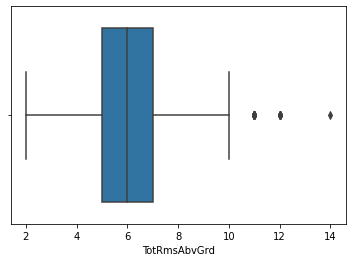

In [71]:
ax = sns.boxplot(x=train["TotRmsAbvGrd"])

In [73]:
train['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

In [74]:
IQR

84025.0